## Bank Note Authentication
The data was obtained from images captured from both authentic and counterfeit banknote-like samples. A high-resolution industrial camera, typically employed for print quality inspection, was used for image acquisition. The resulting images measured 400x400 pixels. Given the specific lens and the proximity to the target object, grayscale images were produced at an approximate resolution of 660 DPI. Feature extraction from these images was performed using Wavelet Transform techniques.


In [66]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np
print(pd.__version__)

2.2.3


In [67]:
df=pd.read_csv('BankNote_Authentication.csv')

In [68]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [69]:
## Independent and Dependent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [70]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [71]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

0.13.2


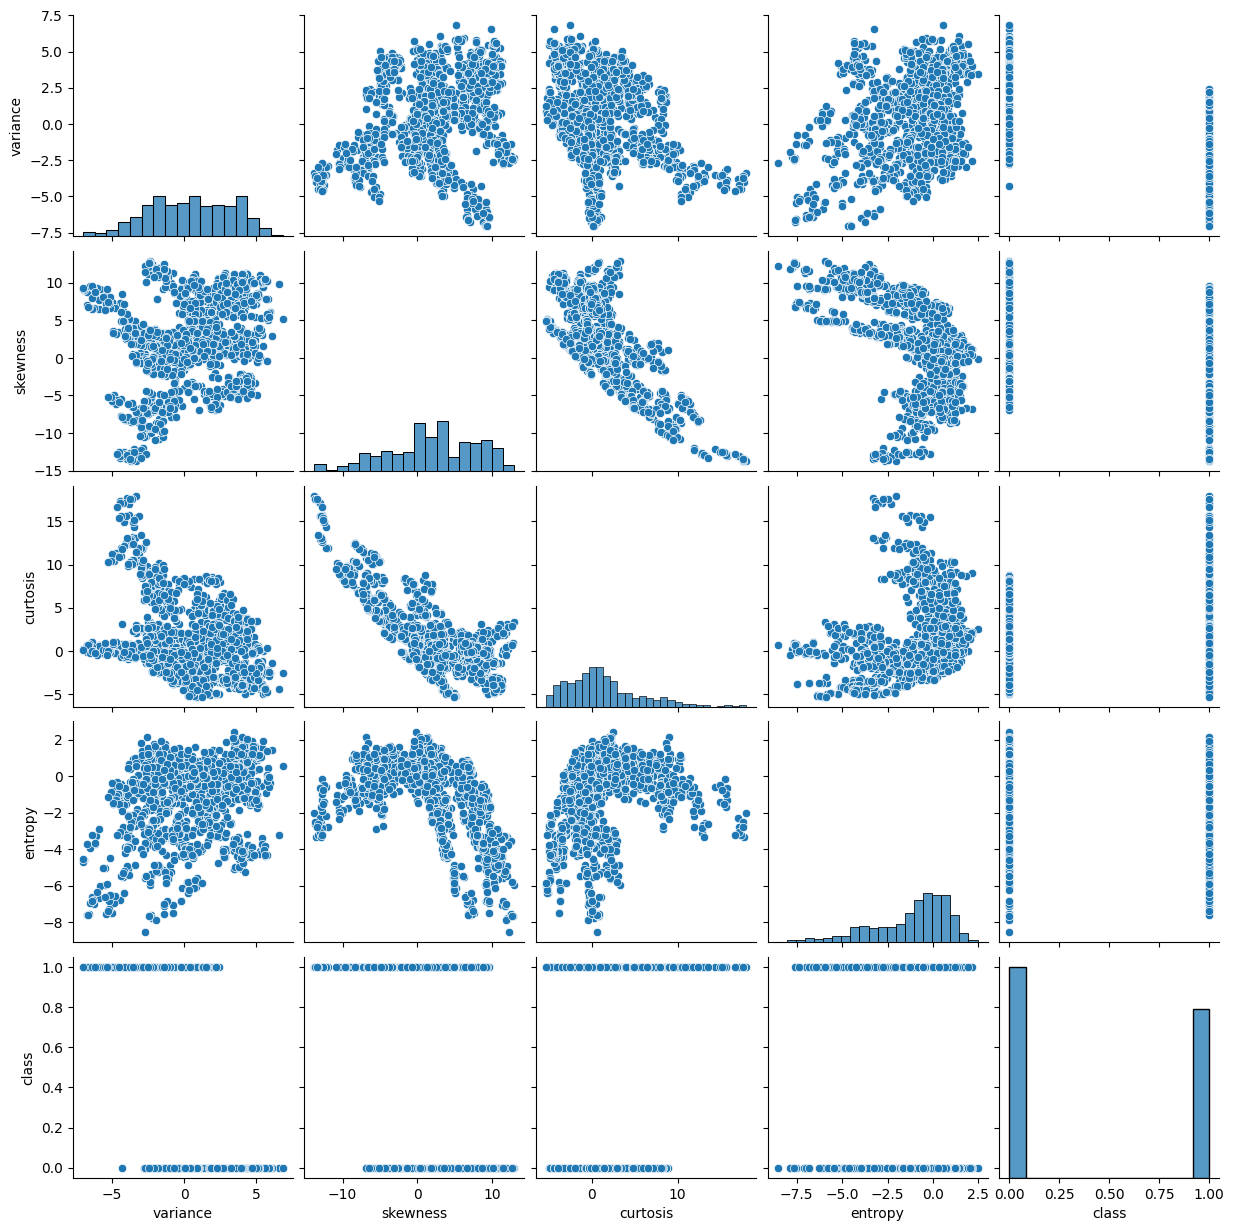

In [72]:
import seaborn as sns
print(sns.__version__)
sns.pairplot(df)

In [73]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [74]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=34)

In [76]:
X_train

,variance,skewness,curtosis,entropy
591,1.52680,-5.5871,8.65640,-1.72200
1184,-0.73510,1.7361,-1.49380,-1.15820
148,3.62770,0.9829,0.68861,0.63403
621,3.39510,1.1484,2.14010,2.08620
521,0.81356,9.1566,-2.14920,-4.18140
...,...,...,...,...
453,3.57610,9.7753,-3.97950,-3.46380
324,3.52570,1.2829,1.92760,1.79910
1109,-0.40857,3.0977,-2.96070,-2.68920
490,1.93210,6.0423,0.26019,-2.05300


In [77]:
X_test

,variance,skewness,curtosis,entropy
1141,-0.49081,2.8452,-3.64360,-3.100400
49,1.63490,3.2860,2.87530,0.087054
1111,-6.36790,8.0102,0.42470,-3.220700
509,-0.29510,9.0489,-0.52725,-2.078900
58,3.13770,-4.1096,4.57010,0.989630
...,...,...,...,...
158,2.26340,-4.4862,3.65580,-0.612510
659,2.18810,2.7356,1.32780,-0.183200
594,5.20320,3.5116,-1.25380,1.012900
466,1.14720,3.5985,1.93870,-0.434060


In [78]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
## Prediction
y_pred=classifier.predict(X_test)

In [80]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [81]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [82]:
score

0.9890909090909091

In [83]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [84]:
import numpy as np
print(np.__version__)

2.0.2


In [85]:
classifier.predict([[0.50813,0.47799,-1.9804,1]])

/opt/anaconda3/envs/banknote-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])